In [13]:
import os
import typing
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import *
import sklearn.gaussian_process.kernels as ker
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from solution import *


# Set `EXTENDED_EVALUATION` to `True` in order to visualize your predictions.
EXTENDED_EVALUATION = False
EVALUATION_GRID_POINTS = 300  # Number of grid points used in extended evaluation
EVALUATION_GRID_POINTS_3D = 50  # Number of points displayed in 3D during evaluation


# Cost function constants
COST_W_UNDERPREDICT = 25.0
COST_W_NORMAL = 1.0
COST_W_OVERPREDICT = 10.0

In [14]:
train_features = np.loadtxt("train_x.csv", delimiter=",", skiprows=1)
train_GT = np.loadtxt("train_y.csv", delimiter=",", skiprows=1)
test_features = np.loadtxt("test_x.csv", delimiter=",", skiprows=1)

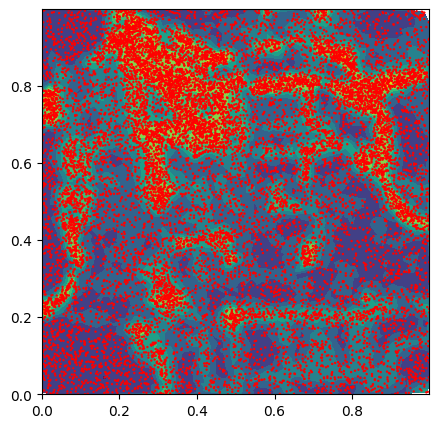

In [15]:
fig1 = plt.figure(figsize=(5,5))
plt.tricontourf(train_features[:,0], train_features[:,1], train_GT)
plt.scatter(train_features[:,0], train_features[:,1], color='red', alpha=1, s=np.ones_like(train_GT)*0.5)

# Main

In [16]:
from collections import defaultdict
from random import sample

def sample_grid(X, Y, Z, rows=5, cols=5, max_points_per_cell = 100):
    x_bound = [min(X),max(X)]
    y_bound = [min(Y),max(Y)]

    res_x = (x_bound[1]-x_bound[0])/cols
    res_y = (y_bound[1]-y_bound[0])/rows
    LUT_data = defaultdict(lambda: list())
    for idx, z in enumerate(Z):
        x = X[idx]
        y = Y[idx]
        col = x // res_x
        row = y // res_y
        LUT_data[(row, col)].append((x, y, z))

    sampled_points = []
    for r in range(rows):
        for c in range(cols):
            points = LUT_data[(r,c)] 
            sampled_points.extend(sample(points, k=min(max_points_per_cell, len(points))))
    return np.array(sampled_points)

In [17]:
tot_points = 3000
rows = 20
cols = 20
max_points_cell = tot_points // (rows*cols)

train_lon = train_features[:,0]
train_lat = train_features[:,1]
sampled_points = sample_grid(
                        train_lon, 
                        train_lat, 
                        train_GT, 
                        rows=rows, 
                        cols=cols, 
                        max_points_per_cell=max_points_cell)
lon_sampled = sampled_points[:,0]
lat_sampled = sampled_points[:,1]
GT_sampled = sampled_points[:,2]


print("ground truth parameters",train_GT.min(), train_GT.max(), train_GT.mean())

# Fit the model
print("Fitting model")
model = Model()
model.fitting_model(
        GT_sampled, 
        sampled_points[..., 0:2],         
        #sample_size = 3000,
        length_scale=0.01,
        alpha=5, #5,
        length_scale_bounds=(1e-05, 100000.0),
        alpha_bounds=(1e-05, 100000.0)
        )

ground truth parameters -1.7625469060104306 64.896183806836 33.17299788386897
Fitting model
fit runtime :  24.05476188659668


In [6]:
# Predict on the test features
print("Predicting on test features")
const = 2.2

predictions, gp_mean, gp_std = model.make_predictions(test_features, add_constant=const)
print(predictions, predictions.min(), predictions.max())

cost_of_pred = cost_function(train_GT, model.make_predictions(train_features, add_constant=const)[0])
print(cost_of_pred)

Predicting on test features
[56.0733735  58.74390247 41.23179023 ... 41.63000904 51.15786646
 52.00298635] 3.058632980031743 65.65657510573804
209.44597271412385


In [7]:
print(predictions.mean())
print(train_GT.mean())

35.68128760254653
33.17299788386897


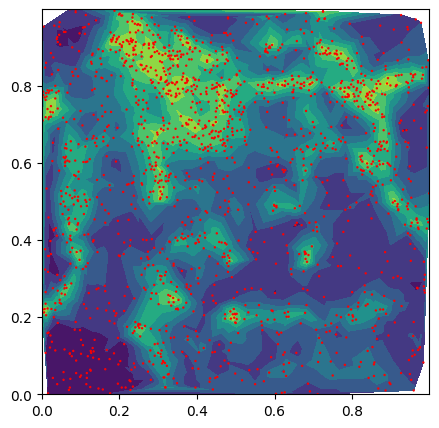

In [18]:
fig1 = plt.figure(figsize=(5,5))
plt.tricontourf(test_features[:,0], test_features[:,1], predictions)
plt.scatter(test_features[:,0], test_features[:,1], color='red', alpha=1, s=np.ones_like(predictions)*0.5)

# Experiment 1

In [9]:
tot_points = 6000
rows = 20
cols = 20
max_points_cell = tot_points // (rows*cols)

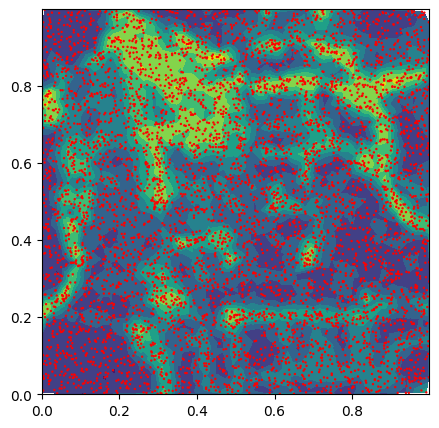

In [11]:
train_lon = train_features[:,0]
train_lat = train_features[:,1]
sampled_points = sample_grid(train_lon, train_lat, train_GT, rows=rows, cols=cols, max_points_per_cell=max_points_cell)
lon_sampled = sampled_points[:,0]
lat_sampled = sampled_points[:,1]
GT_sampled = sampled_points[:,2]
fig = plt.figure(figsize=(5, 5))
plt.tricontourf(lon_sampled, lat_sampled, GT_sampled)
plt.scatter(lon_sampled, lat_sampled, color='red', alpha=1, s=np.ones_like(GT_sampled)*0.5)

In [12]:
len(sampled_points)

5946